In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Read in data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [4]:
most_recent_date = df.iloc[-1]['date']
most_recent_date

'2021-04-09'

### Countries with the most cases

In [5]:
total_cases = df[['date', 'location', 'total_cases', 'total_deaths']]
total_cases = total_cases.loc[total_cases['date'] == most_recent_date]
total_cases = total_cases.sort_values(by='total_cases', ascending=False)
total_cases = total_cases.drop(total_cases.index[[0, 1, 4, 5, 6]]) # not countries

most_affected_countries = total_cases[1:11]
most_affected_countries

,date,location,total_cases,total_deaths
76782,2021-04-09,United States,31084962.0,561074.0
10718,2021-04-09,Brazil,13373174.0,348718.0
33498,2021-04-09,India,13205926.0,168436.0
26755,2021-04-09,France,5000314.0,98202.0
60091,2021-04-09,Russia,4572053.0,100554.0
76338,2021-04-09,United Kingdom,4380167.0,127284.0
832,2021-04-09,Africa,4330793.0,115199.0
74607,2021-04-09,Turkey,3745657.0,33454.0
36496,2021-04-09,Italy,3736526.0,113579.0
68532,2021-04-09,Spain,3347512.0,76328.0


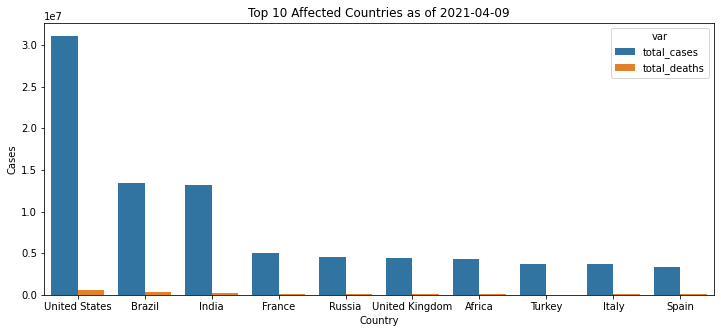

In [6]:
tidy = pd.melt(most_affected_countries, id_vars = ['location'],  value_vars=['total_cases', 'total_deaths'], 
               var_name='var', value_name='Cases')
plt.figure(figsize=(12, 5))
sns.barplot(x="location", hue="var", y="Cases", data=tidy)
plt.title(f'Top 10 Affected Countries as of {most_recent_date}')
plt.xlabel('Country')
plt.show()

### New cases over the past two months

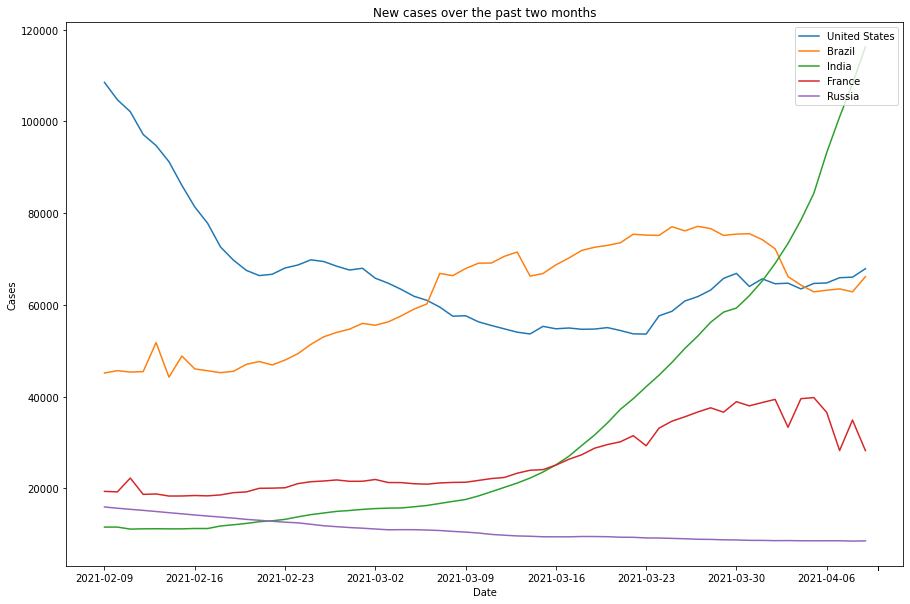

In [7]:
countries = most_affected_countries['location'].values[:5]

plt.figure(figsize=(15, 10))

for country in countries:
    location = df.loc[df['location'] == country].iloc[-60:]
    plt.plot(location['date'], location['new_cases_smoothed'], label=country)

dates = df.loc[df['location'] == 'United States']['date'][-60:]
plt.xticks([dates.iloc[i] if i % 7 == 0 else '' for i in range(len(dates))])
plt.title("New cases over the past two months")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend(loc="upper right")
plt.show()

### Countries with the highest testing rate

In [8]:
total_tests = df.groupby('location')['new_tests'].sum().values
population = df.groupby('location')['population'].nth(-1)
testing_rate = (total_tests/population).sort_values(ascending = False)[:10]

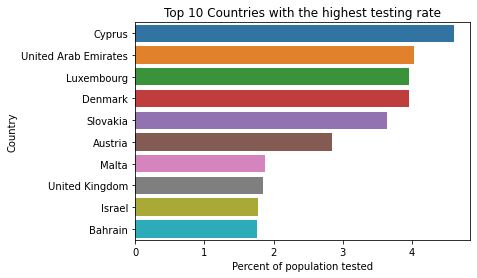

In [9]:
sns.barplot(y = testing_rate.index, x = testing_rate.values, orient = "horizontal")
plt.title('Top 10 Countries with the highest testing rate')
plt.xlabel('Percent of population tested')
plt.ylabel('Country')
plt.show()